

---


#Assignments for notebook 2


---



We prepared a series of excercises for you to put what you´ve learned in notebook 2 into action. 
We'll be covering the following topics:

- Importing DataSet
- Countplot, plot histograms, KDE and comparative boxplot
- Calculate confidence interval
- Anova test 
- Introduction to random function

##Excercise 2.1: Statistical plots
In this excercise you must create different plots for the wine dataset we used on the notebook 2. We ask you to:
* Import the wine and red datasets, store them on different variables.
* Make a countplot (histogram-like plot) that has the different qualities on the horizontal axis.
* Make a plot showing two boxplots, one representing the pH of the red wine, and the other representing the pH of the white whine.

TIPS:
* Remember that the  datasets were taken from these urls:

    https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv (df_red)  
    https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv" (df_white)
* In order to make a countplot, use "sns.countplot", it uses the same parameters as "sns.histogram". Optional: You can set the figure size using "plt.figure(figsize=(x,y)" where x and y represent the width and height.
* In order to make a single plot that has two boxplots (using what we've already seen), you must have a sole dataframe containing both the red and white wine data. Use "pd.concat" to merge both dataframes into one first, and then plot the dataframe. 
Optional: you can set labels for each boxplot by assigning the name of the columns on your new dataframe, you can use the ".columns" method, for example "df.columns=["apples","oranges"].


Solution:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_red =pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df_white =pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")

We can count how many data values ​​are in the DataFrame for each quality level by using sns.countplot

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


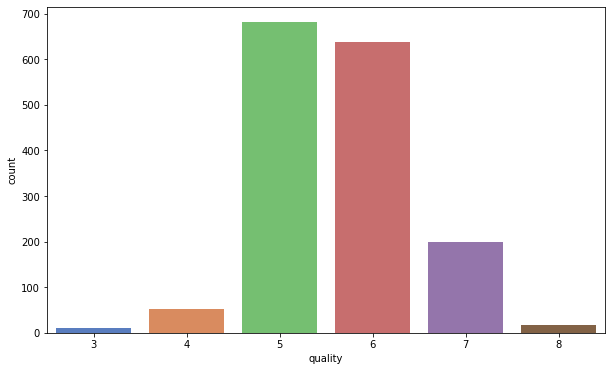

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(df_red["quality"], palette="muted")

We saw that a good way to compare the data of a category is by boxplots of both dataframes simultaneously.
Let's make a comparative boxplot(using sns.boxplot) between red wine and white wine of the category "pH".
Don't forget pd.concat to use a single DataFrame.

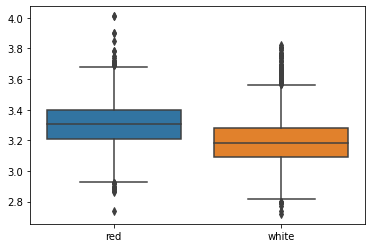

In [ ]:
df_pH = pd.concat([df_red["pH"],df_white["pH"]], ignore_index=True, axis=1)
df_pH.columns = ['red', 'white']
sns.boxplot(data=df_pH)

##Excercise 2.2: Confidence interval
In Notebook 2 we calculated the confidence interval for "alcohol" column present on the wine dataset. Now, we want you to:
* Extract the number of elements of the "Fixed acidity" column in the white wine dataset that have a quality value of 3. Also calculate the mean and the standard deviation. 
* Calculate the confidence interval at 95% confidence for the mean of the "Fixed acidity" column in the white wines dataset, with a quality value of 3, by specifying its upper and lower limits.
* Obtain the mean value of the pH for both type of wines (red and white)

TIPS:
* First filter the white wine dataset by using a boolean mask, keeping the data corresponding to a quality value of 3, store the filtered results on a variable. Next, call the variable you stored (a dataframe) and specify the column you want ("Fixed acidity) by using the typical indexing by name used in pandas.
* You can use the concatenated dataframe of excercise 2.1 and the "mean" method to rapidly extract the requested pH means. Alternatively you can redefine, or re-extract the appropiate columns from the datasets to obtain the required data.

Solution:

In [ ]:
import numpy as np
import pandas as pd
df_red =pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df_white =pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")


df_quality3=df_white[df_white['quality'] == 3]
df_quality3_fixedacidity=df_quality3['fixed acidity']
mean = np.mean(df_quality3_fixedacidity)
N = np.size(df_quality3_fixedacidity)
SD = np.std(df_quality3_fixedacidity)
SE = SD /np.sqrt(N)

print("mean: %.2f N: %.2f Standard Error: %.2f" % (mean, N, SE))

mean: 7.60 N: 20.00 Standard Error: 0.38


Now calculate the upper and lower limits of the confidence interval

In [ ]:
lower_limit = mean-1.96*SE
upper_limit = mean+1.96*SE

print("lower limit: \t%.2f \nmean: \t\t%.2f \nupper limit: \t%.2f" % (lower_limit, mean, upper_limit))

lower limit: 	6.86 
mean: 		7.60 
upper limit: 	8.34


Obtain the mean pH of both types of wines

In [ ]:
df_pH = pd.concat([df_red["pH"],df_white["pH"]], ignore_index=True, axis=1)
df_pH.columns = ['red', 'white']
df_pH.mean()

red      3.311113
white    3.188267
dtype: float64

##Excercise 2.3: ANOVA

For the next excercise, you'll have compare the means of many samples by using the ANOVA test. We recommend you to revise the basics idea of anova (check the notebook) prior to this excercise, it's pretty normal to get confused when making multiple comparisons simultaneouly. We ask you to:
* Extract the  mean of the "sulphates" content for each quality of the red wine. Do the same for the white wine dataset (Optionally you can extract the size and std too)
* Check if the mean of the sulphates contents for each quality is probably the same by using the ANOVA test.
* Formulate a conclusion

TIPS:
* You can follow the same guidelines included on the Notebook 2 for the "residual sugar" analysis. First, we recomend you to use the "groupby" method to summarize all the requested means for each wine.
* Don't forget to install correctly and import the "Pingouin" module on google collab in order to make the ANOVA test.
* Remember the ANOVA test can be easily executed by using the .anova method for a dataframe. Revise the "dependent" and "between" variable concepts in order to make a proper test (these variables are used as parameters).


Solution:

In [ ]:
import pandas as pd
df_red =pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df_white =pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")

In [ ]:
df_red.groupby(["quality"])["sulphates"].describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,10.0,0.570000,0.122020,0.40,0.5125,0.545,0.615,0.86
4,53.0,0.596415,0.239391,0.33,0.4900,0.560,0.600,2.00
5,681.0,0.620969,0.171062,0.37,0.5300,0.580,0.660,1.98
6,638.0,0.675329,0.158650,0.40,0.5800,0.640,0.750,1.95
7,199.0,0.741256,0.135639,0.39,0.6500,0.740,0.830,1.36
8,18.0,0.767778,0.115379,0.63,0.6900,0.740,0.820,1.10


In [ ]:
df_white.groupby(["quality"])["sulphates"].describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,20.0,0.474500,0.119845,0.28,0.38,0.44,0.5425,0.74
4,163.0,0.476135,0.117973,0.25,0.38,0.47,0.5400,0.87
5,1457.0,0.482203,0.098205,0.27,0.42,0.47,0.5300,0.88
6,2198.0,0.491106,0.113357,0.23,0.41,0.48,0.5500,1.06
7,880.0,0.503102,0.130195,0.22,0.41,0.48,0.5800,1.08
8,175.0,0.486229,0.147073,0.25,0.38,0.46,0.5850,0.95
9,5.0,0.466000,0.092628,0.36,0.42,0.46,0.4800,0.61


Then, make the ANOVA test to compare them. What result would you expect?
Remember that a high p-value (>0.025, here stated as "p-unc") indicates that the mean of the "sulphate" content is the same regardless of the quality of the wine (remember to first install and import the *Pingouin* library).

In [ ]:
!pip install pingouin
import pingouin as pg

     |████████████████████████████████| 225kB 4.1MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.9-cp36-none-any.whl size=223375 sha256=ab30602a4432115faed5ac7b927d3d68f916ea9bc49c17eab911781610539b53
  Stored in directory: /root/.cache/pip/wheels/6c/d7/26/a23b9ed74061adc5cf8f5e016bbe2902a8ebf63b6471047dbc
  Created wheel for outdated: filename=outdated-0.2.0-cp36-none-any.whl size=4961 sha256=015c394056fa7a6d4fc843c451c7a27c15bea6dd4371576d7a81165d287cce30
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp36-none-any.whl size=7051 sha256=98749c1c0d6389a77063c0fe24830046c8964fda36d0749419c599d7932c5211
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin outdated littleutils


In [ ]:
df_red.anova(dv="sulphates", between="quality")

,Source,ddof1,ddof2,F,p-unc,np2
0,quality,5,1593,22.273376,1.225890e-21,0.065342


In [ ]:
df_white.anova(dv="sulphates", between="quality")

,Source,ddof1,ddof2,F,p-unc,np2
0,quality,6,4891,3.642317,0.001308,0.004448


For both sets of wines, the sulphates content for each quality is not same, being the p-value too small to accept the null hypothesis, at least at a confidence level of 95% (<0,025).
This result becomes quite obvious by merely observing the "groupby" table for the red wine, the means are quite different and the std pretty small.
But this cannot be concluded as easily for the white wine dataset given the more similar observations.





---
#Advanced/Research Assignments


---







#Excercise 2.4
* Make a single plot containing histograms for the ALL the different variables found on the red wine dataset (fixed acidity, sulphates, etc)
* Make a single graph showing a histogram sumperimposed with a kernel density estimation plot for the alcohol content on the red wines.


TIPS:
* You can use "df.hist(parameters)" dataframe's method in order to accomplish this task. You can read the documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)
* The mentioned method outputs also a log a little annoying log before the plots. As a workaround for getting rid of the log, you can import matplotlib.pyplot as plt, and finish your with "plt.show()" line.
* You can make a histogram with a KDE plot by using the function sns.distplot. You can read about it [here](https://seaborn.pydata.org/generated/seaborn.distplot.html). As a first parameter you must put a column of your dataframe (a column of a dataframe in pandas is a special type of object called a "Series")

Solution:

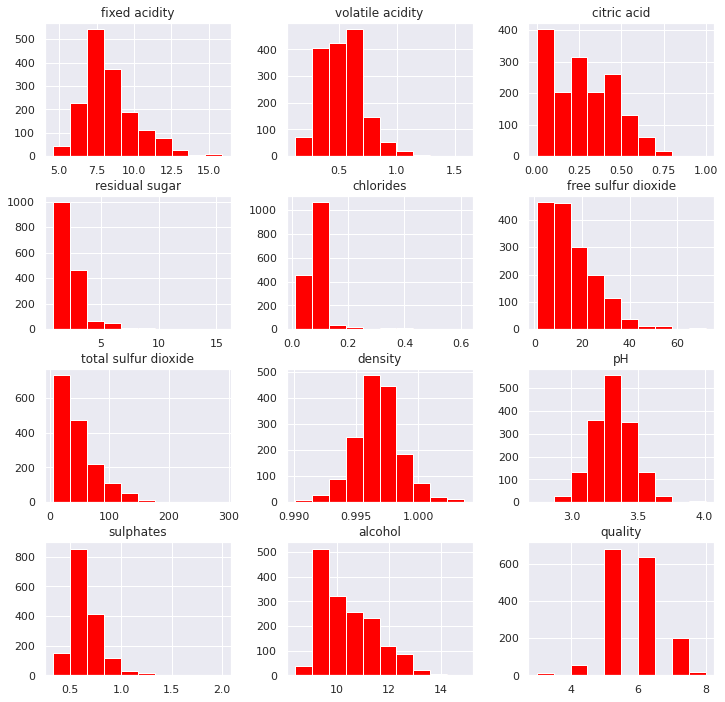

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
df_red.hist(figsize=(12,12), color='red')
plt.show()

Now we want to see the histogram for the category "alcohol" with a kernel density plot. Histograms and KDE can be combined using sns.distplot(*dataset*.*category*, kde=true). Make the said graph using the df_red dataset and the alcohol category.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


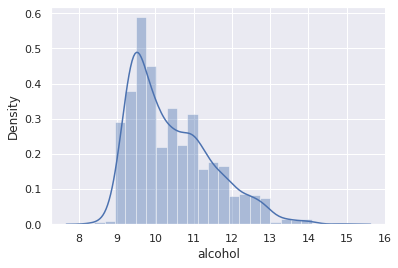

In [ ]:
sns.distplot(df_red["alcohol"], kde=True)

#Excercise 2.5 : Random numbers and distributions
In this excercise you'll have to master methods for random number generation and making small matrices. We ask you to:
* Generate a numpy array (list-like object) of 10 random numbers, that take the values 0 or 1.
* Generate a numpy ndarray (matrix-like object) containing 8 random integers, distributed in a 2x4 grid.
* Generate 5 random numbers from a Poisson distribution of expected value 2.5.
* Generate 30 random numbers from a Binomial distribution of n=10 (number of trials) and p=0.5 (probability of success).
* Generate 1000 random numbers from a Normal distribution of mean 0 and standard deviation 0.2. Plot a histogram for these random numbers, but this time use the matplotlib library for doing so.

TIPS:
* Random numbers can be easily generated with the numpy library. In order tu generate random on arrays or ndarrays use the "np.random.randint" function. You can read the documentation [here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html)
* You can generate random functions coming from numerous statistical distributions with the funcion np.random.name_of_the_distribution (eg: np.random.normal). Here are some links for documentation you might need:

    [List of different distributions](https://numpy.org/doc/1.16/reference/routines.random.html)

    [Binomial distribution random number generation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html)

    [Poisson distribution ranodm number generation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html)

    [Normal distribution random number generation](https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.random.normal.html)

* You can make histograms with matplotlib with the function plt.hist. You can the documentation [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) and take a look to a simple [example](https://matplotlib.org/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py) too.

NOTE: Generating random numbers on computers from scratch is not as easy as it might sound, there's no truly 100% random method, therefore the numbers generated from a computer are called pseudo-random numbers. You can read more about this [here](https://pybonacci.org/2013/01/11/numeros-aleatorios-en-python-con-numpy-y-scipy/)



Solution:

The random module of the Python standard library includes a set of functions that allow obtaining different modes of random numbers or, to be strict, pseudo-random. However Numpy's library has a larger set of random functions that can be used, it can even generate random number from statistical distributions. 





So let's play around with the random function from numpy.
The function *np.random.randint (low, high = None, size = None, dtype = int)*
returns random integers from low (inclusive) to high (exclusive).

For the first part of the excercise, by using np.random.randint, we'll generate random integers from a “discrete uniform” distribution in the “half-open” interval [low, high). If we only specify the "low" value ("high" is an optional parameter), then the results goes from 0 to low ( [0, low) ).

In [ ]:
import numpy as np
np.random.randint(2, size=10)

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1])

Obs: Everytime you execute the cell, the values ​​change.

Now, using the same function, we'll return a 2x4 matrix where each element can be a number ranging from 0 to 4.
Help: to build a 2x4 matrix use the parameter size = (i, j), where i: row, j: column.

In [ ]:
np.random.randint(5, size=(2, 4))

array([[3, 4, 0, 2],
       [0, 1, 0, 3]])

Another interesting function is the *numpy.random.(name_of_distribution)* which generates random numbers from a given distribution.

For example, with the help of the *np.random.poisson(lambda=None, size=None)*
 method, we can get the random samples from the Poisson distribution and return the random samples using this method. The parameters of the distribution are always the first parameters of the function.

In [ ]:
np.random.poisson(2.5, 5)  

array([4, 2, 4, 0, 1])

Now we'll repeat the process for a binomial distribution using *numpy.random.binomial(n, p, size=None)* with n=10, p=0.5 and size=30


In [ ]:
np.random.binomial(10, 0.5, 30)

array([2, 5, 3, 3, 3, 4, 5, 3, 6, 8, 4, 6, 7, 6, 5, 5, 8, 3, 6, 4, 4, 6,
       5, 6, 5, 5, 3, 6, 5, 7])

To finish the excercise we will need the matplotlib library, so we'll import it.
Next, we'll use np.random.normal to calculate random numbers for a normal distribution and store them on a variable.
To make a clearer plto we'll put x and y label, and also a title.
And finally we'll use the plt.show() command in order to print the plot.

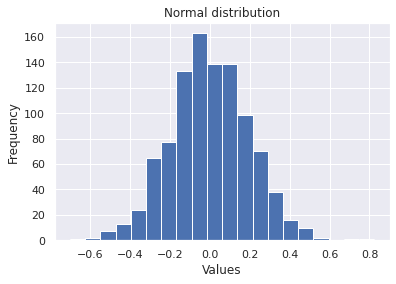

In [ ]:
import matplotlib.pyplot as plt

# we generate the data
data = np.random.normal(0, 0.2, 1000)

# histogram of normal distribution
plt.hist(data, 20)
plt.ylabel('Frequency')
plt.xlabel('Values')
plt.title('Normal distribution')
plt.show()

We can repeat all the previous step for a poisson distribution, but this time using np.random.poisson:

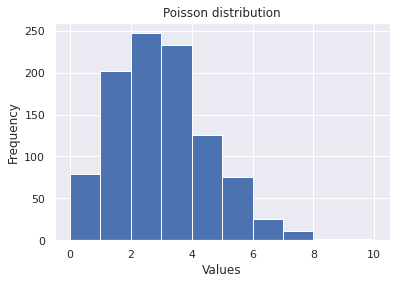

In [ ]:
import matplotlib.pyplot as plt

# we generate the data
lambd = 2.5 # lambda parameter of Poisson distribution
size = 1000 # amount of random numbers sampled from the distribution
data2 = np.random.poisson(lambd, size)  #creating sample data

# histogram of poisson distribution sampled data
plt.hist(data2, 10)
plt.ylabel('Frequency')
plt.xlabel('Values')
plt.title('Poisson distribution')
plt.show()

##Excercise 2.6: Central limit theorem

This is an extra challenging excercise that will require dedications, reasoning and time. The assignment is simple:

* Convince yourself that the Central Limit Theorem is true, by plotting a a new random variable that is a sum (or an average) of many other random variables that follow a binomial distribution. The new random variable must follow a normal distribution, and therfore will have a symmetrical bell shape.
* Repeat the process using random variables that follow an exponential, poisson and geometric distribution.

NOTE: It's usual in Statistics and Machine Learning, to assume that data is normally distributed. Many measurements are indirectly measuring a sum or average of some properties, and that is why so many properties have normal distributions. We'll be using these result in the future.

TIPS:
* Revise the Central Limit theorem statements to clearly understand it,the objective is to obtain a new variable that follows a normal distribution, even though it is composed of variables of different distribution.
* Create an empty list (store it on a variable) to allocate many results for the New variable (the one that WILL follow a normal distribution).
* Use a "for loop" to repeat many times a process. Inside the loop, create many random numbers from a certain distribution, and then take the average of them by using numpy's ".mean()" method. Append the average to the list you previously created. Let the loop repeat the process 20000 times (it will append many averages to the list).

    We recommend you to practice simple "for loops" first, make focus on for loops that uses the "range" function, this [link](https://www.w3schools.com/python/python_for_loops.asp) might help you getting started.

    On this [link](https://www.w3schools.com/python/ref_list_append.asp) you can find information on how to append elements to an already existing list.

* Plot a histogram with plt.hist (importing matplotlib first), using your new list as a parameter. Links with documentation for this function were provided on excercise 2.5.

Optional additions:
* Calculate all the New variables for the 4 distributions on the same code.
* Create a dictionary (another type of list), associating the name of the plot (binomial,geometric, exponential, poisson), and the corresponding list that has all the values of the new variables. Transform this dictionary onto a dataframe, this will make indexing an plotting easier.

    You can find information and examples of dictionaries [here](https://www.w3schools.com/python/python_dictionaries.asp)

    You can understand how to construct a new dataframe from a dictionary, by reading the panda's Dataframe [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

* Plot the 4 new variables on the same graph, using plt.subplots, a function of matplotlib for making many plot on the same output. We encourage you to start using matplotlib on this advanced assignments, because many times it will be the only way to display the information exactly the way you want.

    You can read about subplots on this [link](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html)

* Format the histograms as you like, by choosing the number of bins, the position on the grid and the color. Set titles for every plot.


Solution:

*Simple example:*

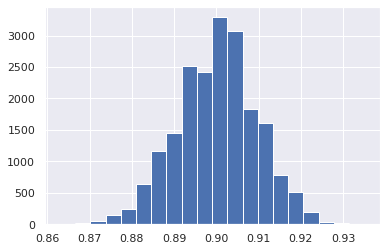

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

muestra_binomial = []
p = 0.9
size = 1000

for i in range(1,20000):
    muestra = np.random.binomial(1, p, size=size)
    muestra_binomial.append(muestra.mean())

plt.hist(muestra_binomial, 20)
plt.show()

*Elaborated example with optional additions:*

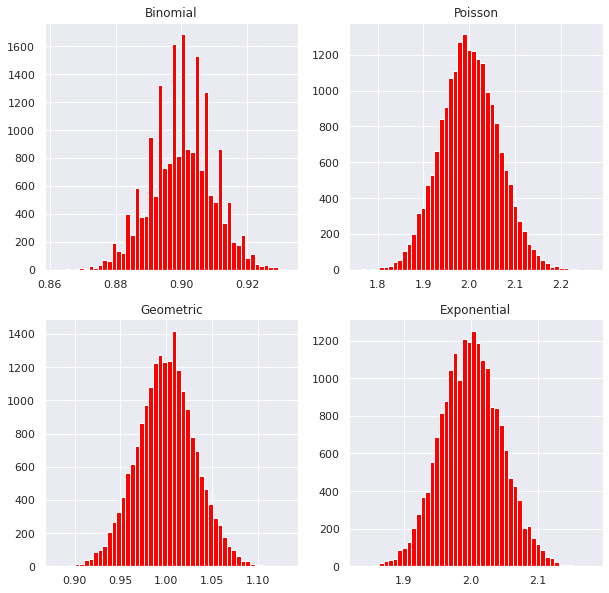

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

muestra_binomial = []
muestra_exp = []
muestra_poisson = []
muestra_geometric = []
p = 0.9
lam = 1.0
size = 1000

for i in range(1,20000):
    muestra = np.random.binomial(1, p, size=size)
    muestra_binomial.append(muestra.mean())
    muestra = np.random.exponential(scale=2.0,size=size)
    muestra_exp.append(muestra.mean())
    muestra = np.random.geometric(p=.5, size=size)
    muestra_geometric.append(muestra.mean())
    muestra = np.random.poisson (lam=lam, size=size)
    muestra_poisson.append(muestra.mean()) 

df = pd.DataFrame({ 'binomial' : muestra_binomial, 
                     'poisson' : muestra_poisson,
                     'geometric' : muestra_geometric,
                    'exponential' : muestra_exp})


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
df["binomial"].hist(ax=axes[0,0], bins = 50, color = 'red')
df["exponential"].hist(ax=axes[0,1], bins = 50, color = 'red')
df["poisson"].hist(ax=axes[1,0], bins = 50, color = 'red')
df["geometric"].hist(ax=axes[1,1], bins = 50, color = 'red')

axes[0,0].set_title('Binomial')
axes[0,1].set_title('Poisson')
axes[1,0].set_title('Geometric')
axes[1,1].set_title('Exponential')
plt.show()